# Capstone 2: loan default, EDA


importing the necicary packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


importing the necicary files. In the data wrangling portion of the capstone, I focused on creating a nice datafram that had descriptions of the columns which I called into this notbook as 'colomnDescription' in the cell below. secondly, the file I saved and explored in the data wrangling notebook was not loading for some reason. well, the cell was in the process of loading however the cell never compiled. since I did not actually need to manipulate that datafram significantly, i found it easier to just load the original data and start from the begining. the only manipulation i did perform on that file was transposing, which is what i do in the cells below

In [2]:
columnDescription = pd.read_csv('colDescriptionT.csv')
previous_application = pd.read_csv('previous_application.csv')

just t have a good reverence as to what the columns mean, ill print out the column description dataframe i created in a prior notebook

In [3]:
display(columnDescription)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,...,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv
1,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan,Loan annuity,...,The industry of the seller,Term of previous credit at application of the ...,Grouped interest rate into small medium and hi...,Detailed product combination of the previous a...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Did the client requested insurance during the ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,grouped,NaN,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,NaN


Before we look for any relationships between featurs, its helpful to first begin by printing the info of the datafram in this notebook to take a look at what Dtypes we are dealing with

In [4]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Before we move forward, we need to find how much data is missing from our dataframe. The following line prints the percentage of missing data per column 

In [5]:
round((previous_application.isnull().sum()/len(previous_application)*100.00),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

just to better visualize how much data is missing, i created a bar graph which shows the percentage of missing values. i also plotted a horizontal red line that indicates the '40%' line meaning, any bar above that line is missing more than 40% 

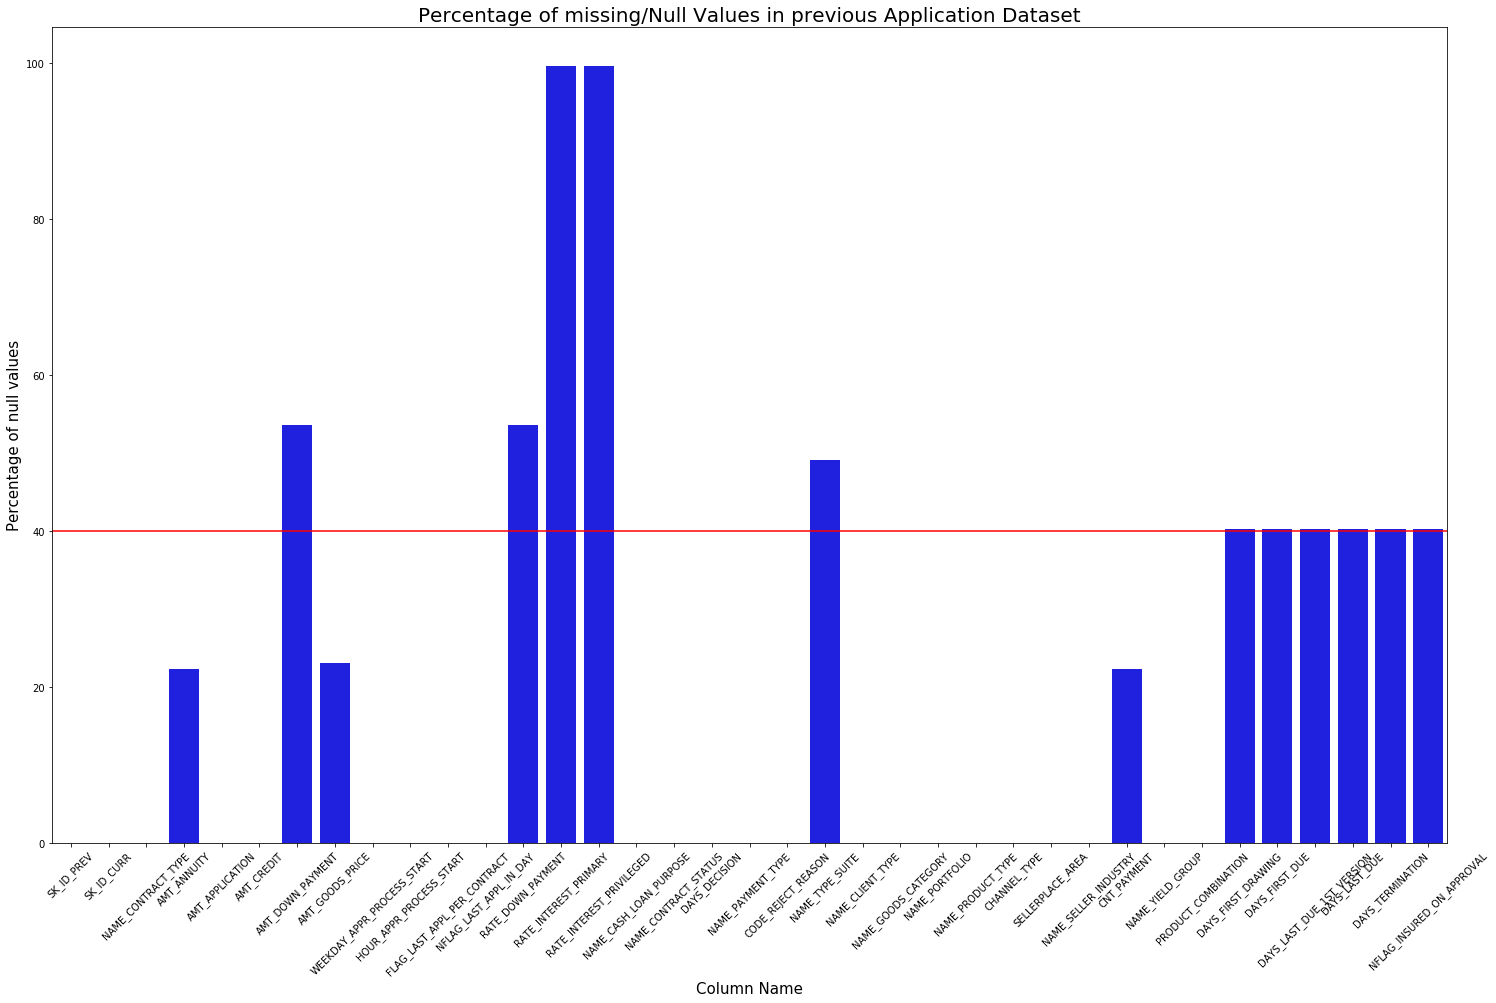

In [6]:
plt.figure(figsize = [25,15])
plt.title("Percentage of missing/Null Values in previous Application Dataset",fontsize=20)
plt.xlabel("Column Name", fontsize=15)
plt.ylabel("Percentage of null values", fontsize= 15)
plt.xticks(rotation=45)
ax = sns.barplot(previous_application.columns,round((previous_application.isnull().sum()/previous_application.shape[0])*100,2), color = 'blue')
ax.axhline(40,color='red')
plt.show()

40% null values is quite significant, I think its best if we do not take these into consideration because it could result in missleading results.

In [7]:
# Storing columns names along their % of NULL values and storing them as 'previous_missing'
previous_missing = pd.DataFrame((previous_application.isnull().sum()/len(previous_application))*100).reset_index()
previous_missing.columns = ['Column Name', 'Null Value %']

In [8]:
previous_missing

,Column Name,Null Value %
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


the following cell filters out any columns that contain 40% null values or more

In [9]:
# Columns having more than 40% Null Values
missing_40 = previous_missing[previous_missing['Null Value %']>=40]
#the following line only keeps columns with less than 40% missing values
previous_missing[previous_missing['Null Value %'] < 40]

,Column Name,Null Value %
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000
10,FLAG_LAST_APPL_PER_CONTRACT,0.000000


im also choosing to drop an additional 4 columns which i belive wont be useful for this investigation. columns such as 'WEEKDAY_APPR_PROCESS_START' which indicate what day of the week the applicant started their loan process

In [10]:
#printing description just to verify what the column contains
print(columnDescription[['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']])

                          WEEKDAY_APPR_PROCESS_START  \
0                                   application_data   
1  On which day of the week did the client apply ...   
2                                                NaN   

                             HOUR_APPR_PROCESS_START  \
0                                   application_data   
1  Approximately at what hour did the client appl...   
2                                            rounded   

                         FLAG_LAST_APPL_PER_CONTRACT  \
0                           previous_application.csv   
1  Flag if it was last application for the previo...   
2                                                NaN   

                              NFLAG_LAST_APPL_IN_DAY  
0                           previous_application.csv  
1  Flag if the application was the last applicati...  
2                                                NaN  


In [11]:
# Adding 4 more variables to the unwanted list which won't help in our analysis
prev_unwanted = missing_40['Column Name'].to_list() + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [12]:
len(prev_unwanted)

15

In [13]:
previous_application.drop(labels = prev_unwanted, axis=1, inplace=True)

double cheking the % null values in order to verify sucessful filtering

In [14]:
round((previous_application.isnull().sum()/len(previous_application)*100.00),2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
dtype: float64

although we still have 'AMT_ANNUITY', 'AMT_GOODS_PRICE', and 'CNT_PAYMENT' that still have just over 20% missing values, we have made progress by droping columns containing 40% null values or more along with 4 other columns which dont seem to contribute any valuable information, we can proceed to find a relation between any leftover featurs. before we do that, its a good idea to double check our new dataframe.

In [15]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

We can now begin to find any relationship between the features

In [16]:
previous_application.corr()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
SK_ID_PREV,1.000000,-0.000321,0.011459,0.003302,0.003659,0.015293,0.019100,-0.001079,0.015589
SK_ID_CURR,-0.000321,1.000000,0.000577,0.000280,0.000195,0.000369,-0.000637,0.001265,0.000031
AMT_ANNUITY,0.011459,0.000577,1.000000,0.808872,0.816429,0.820895,0.279051,-0.015027,0.394535
AMT_APPLICATION,0.003302,0.000280,0.808872,1.000000,0.975824,0.999884,0.133660,-0.007649,0.680630
AMT_CREDIT,0.003659,0.000195,0.816429,0.975824,1.000000,0.993087,0.133763,-0.009567,0.674278
AMT_GOODS_PRICE,0.015293,0.000369,0.820895,0.999884,0.993087,1.000000,0.290422,-0.015842,0.672129
DAYS_DECISION,0.019100,-0.000637,0.279051,0.133660,0.133763,0.290422,1.000000,-0.018382,0.246453
SELLERPLACE_AREA,-0.001079,0.001265,-0.015027,-0.007649,-0.009567,-0.015842,-0.018382,1.000000,-0.010646
CNT_PAYMENT,0.015589,0.000031,0.394535,0.680630,0.674278,0.672129,0.246453,-0.010646,1.000000


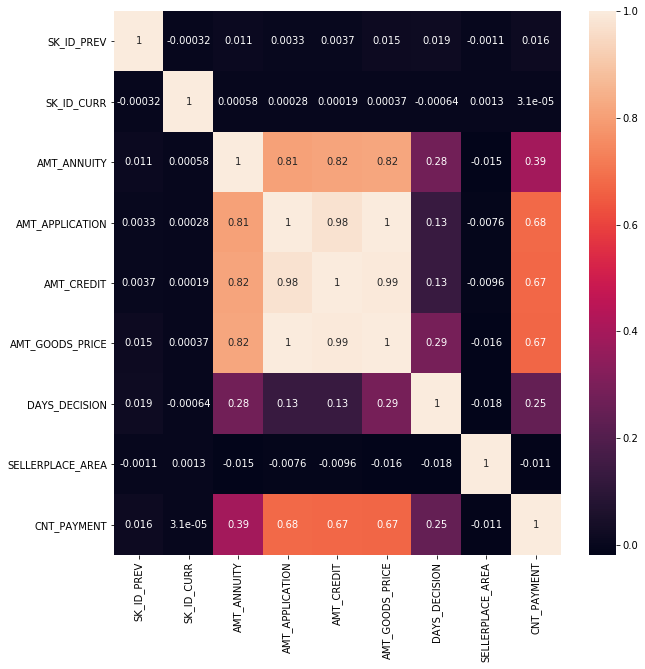

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(previous_application.corr(), annot = True)
plt.show()

we now have a nice heatmap which can aid in discovering relationships between features but as you can see, ther is no real tangable mathmatical relationship between the values.

# Not sure where to go from here, did i drop too much data? 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data

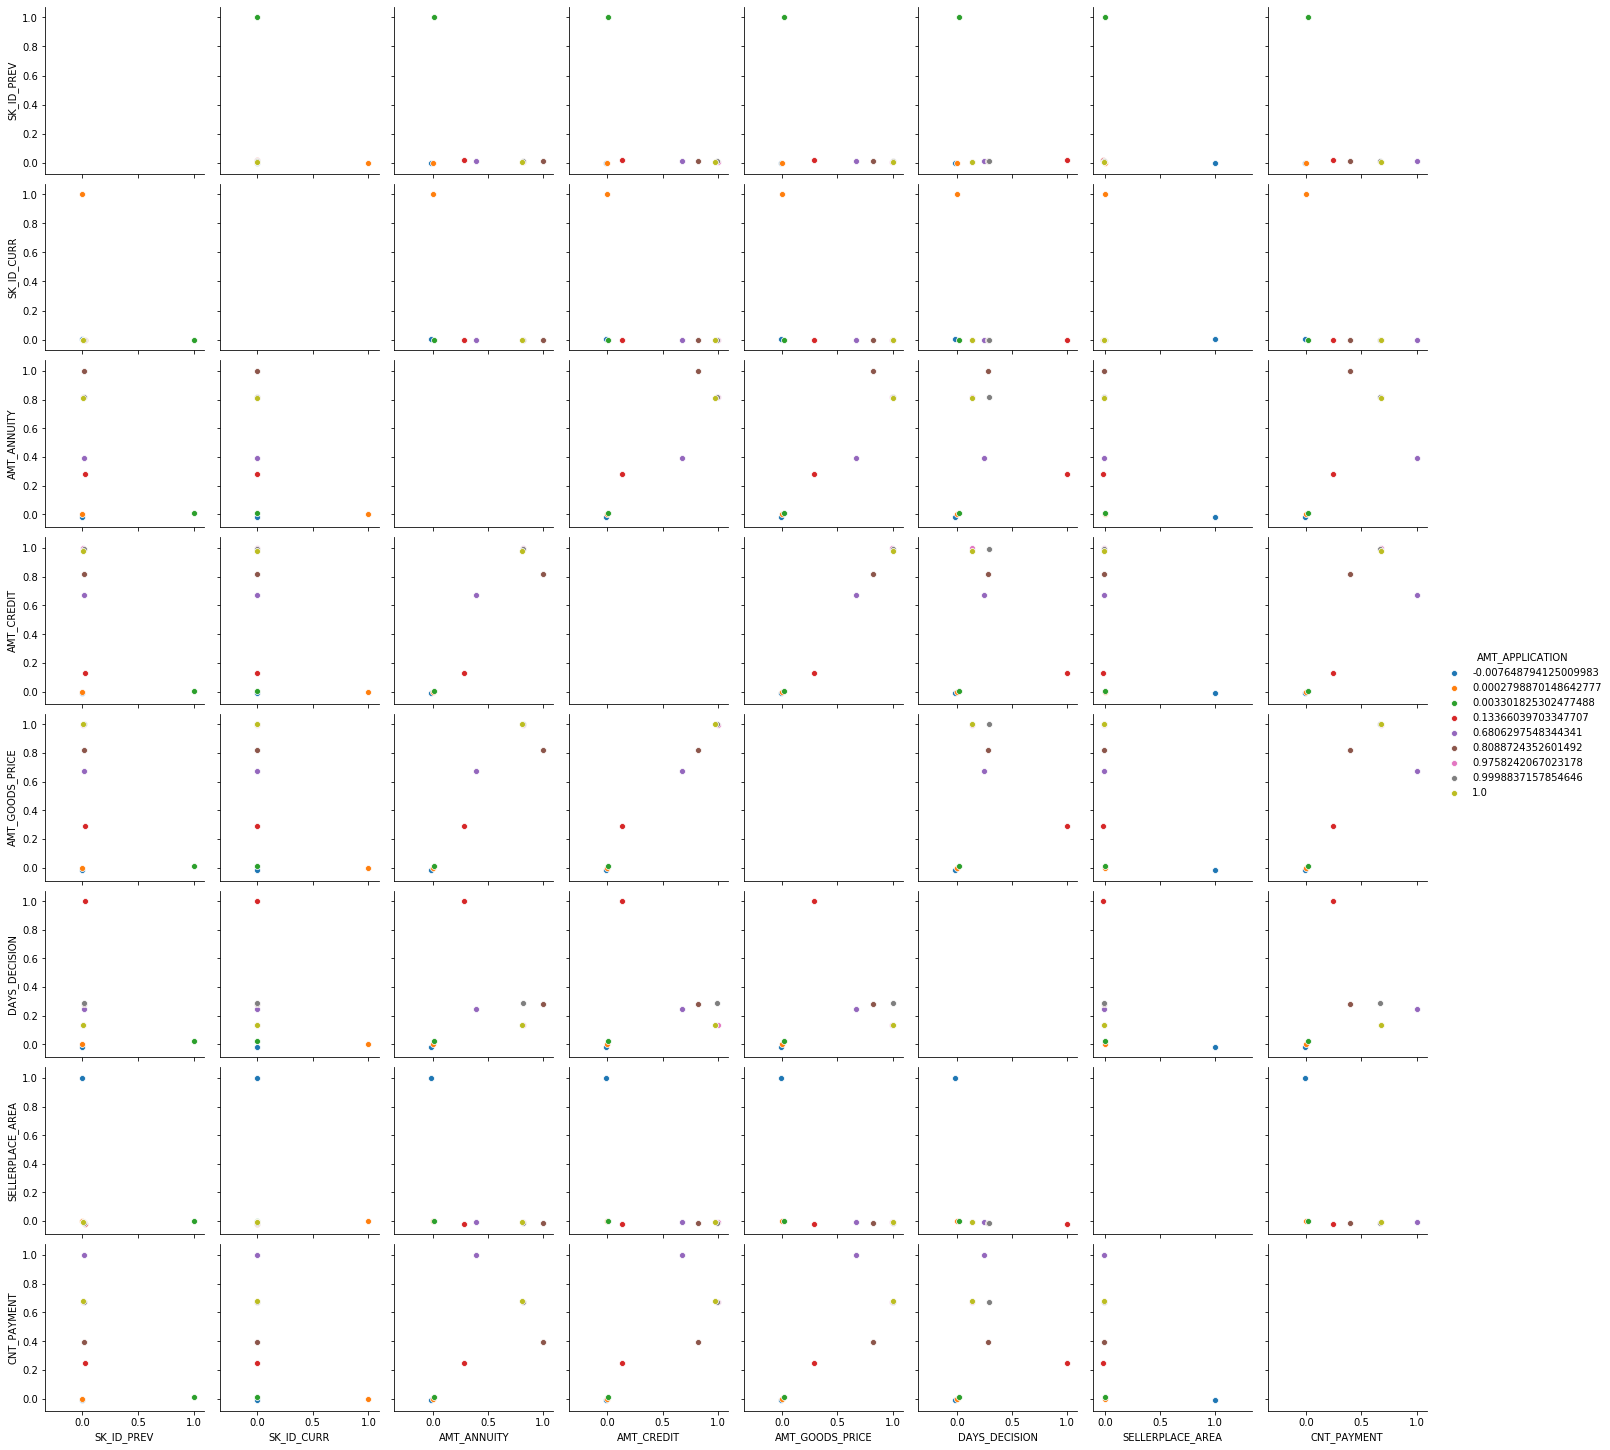

In [50]:
sns.pairplot(data=previous_application.corr(), hue='AMT_APPLICATION')

In [51]:
columnDescription


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,...,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv
1,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan,Loan annuity,...,The industry of the seller,Term of previous credit at application of the ...,Grouped interest rate into small medium and hi...,Detailed product combination of the previous a...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Did the client requested insurance during the ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,grouped,NaN,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,NaN


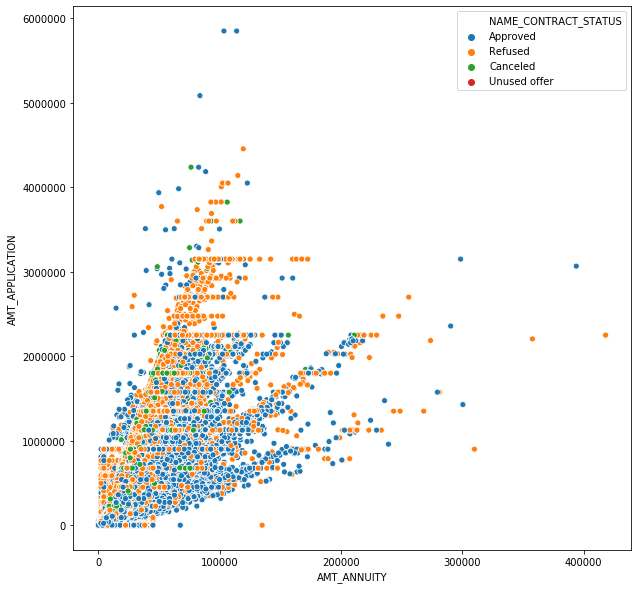

In [59]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y = 'AMT_APPLICATION' , x = 'AMT_ANNUITY', data = previous_application, hue='NAME_CONTRACT_STATUS')
plt.show()

based off of the plot above, we can kind of see a relationship between the application ammount and the annuity of the client with a hue of the contract status. the refused clients seem to me applyig for loans which are out of thier price range, which would make sence. 